In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
airport_comps = pd.read_csv("./complaints-by-airport.csv")
cat_comps = pd.read_csv("./complaints-by-category.csv")
subcat_comps = pd.read_csv("./complaints-by-subcategory.csv")
codes = pd.read_csv("./iata-icao.csv")

In [24]:
airport_comps.head()

,pdf_report_date,airport,year_month,count
0,2019-02,ABE,2015-01,0
1,2019-02,ABE,2015-02,0
2,2019-02,ABE,2015-03,0
3,2019-02,ABE,2015-04,0
4,2019-02,ABE,2015-05,2


In [25]:
subcat_comps.head()

,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False


In [26]:
subcat_comps = subcat_comps.rename(columns = {'airport': 'airport_code'})

In [27]:
codes.head()

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477


In [28]:
codes = codes.rename(columns = {'iata': 'airport_code'})

In [29]:
codes = codes.drop(columns = ['icao'])

In [30]:
codes.head()

,country_code,region_name,airport_code,airport,latitude,longitude
0,AE,Abu Zaby,AAN,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,Al Dhafra Air Base,24.2482,54.5477


In [31]:
complaints = subcat_comps.merge(codes, on = ['airport_code'], how = 'inner')
complaints.head()

,pdf_report_date,airport_code,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed,country_code,region_name,airport,latitude,longitude
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408


In [32]:
complaints = complaints.drop(columns = ['pdf_report_date', 'category', 'subcategory', 'clean_cat_status', 'clean_subcat_status', 
                                        'is_category_prefix_removed'])
complaints.head()

,airport_code,year_month,count,clean_cat,clean_subcat,country_code,region_name,airport,latitude,longitude
0,ABE,2015-01,0,Hazardous Materials Safety,General,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
1,ABE,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
2,ABE,2015-02,0,Hazardous Materials Safety,General,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
3,ABE,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408
4,ABE,2015-03,0,Hazardous Materials Safety,General,US,Pennsylvania,Lehigh Valley International Airport,40.6521,-75.4408


In [33]:
complaints = complaints.rename(columns = {
    'clean_cat': 'category',
    'clean_subcat': 'subcategory'})

In [34]:
most_complaints = complaints.groupby('airport')['count'].count()


In [35]:
most_complaints.sort_values(ascending=False).head(10)

airport
Orlando International Airport                       6413
John F. Kennedy International Airport               6399
Los Angeles International Airport                   6360
Newark Liberty International Airport                6302
Denver International Airport                        6269
Hartsfield-Jackson Atlanta International Airport    6089
Phoenix Sky Harbor International Airport            5920
Seattle-Tacoma International Airport                5802
Dallas/Fort Worth International Airport             5708
Chicago O'Hare International Airport                5593
Name: count, dtype: int64

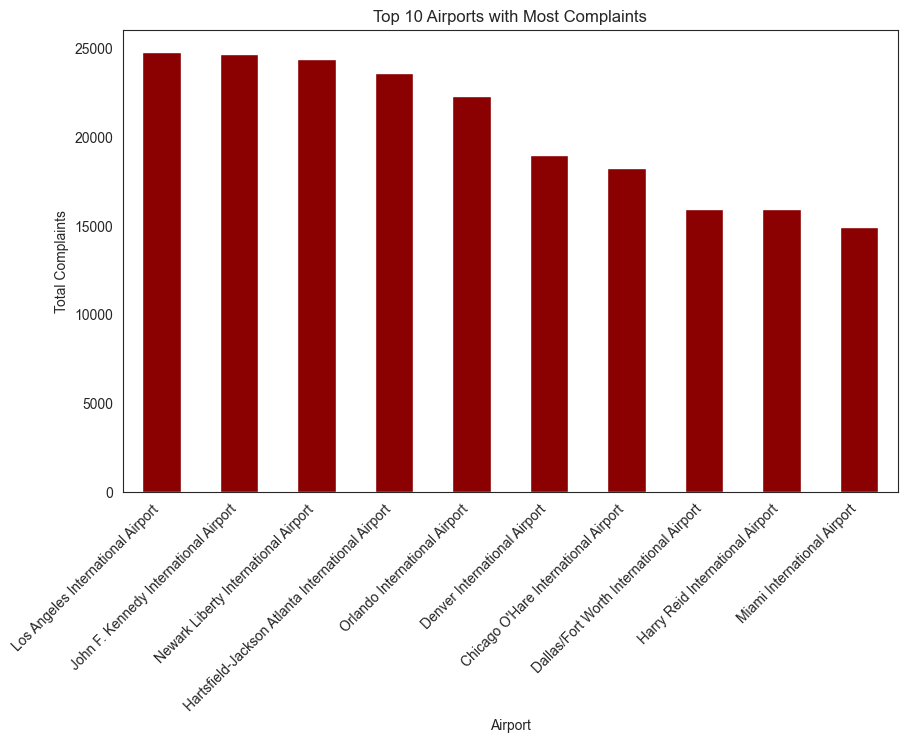

In [36]:

# Group by airport and sum the complaints
airport_complaints =  complaints.groupby('airport')['count'].sum().nlargest(10)

# Plotting bar plot
plt.figure(figsize=(10, 6))
airport_complaints.plot(kind='bar', color='darkred')
plt.title('Top 10 Airports with Most Complaints')
plt.xlabel('Airport')
plt.ylabel('Total Complaints')
plt.xticks(rotation=45, ha='right')
plt.show()

## Apply Gestalt Principles

C:\Users\gyanr\AppData\Local\Temp\ipykernel_12808\3603316092.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=airport_complaints, y='airport', x='count', palette=colors)


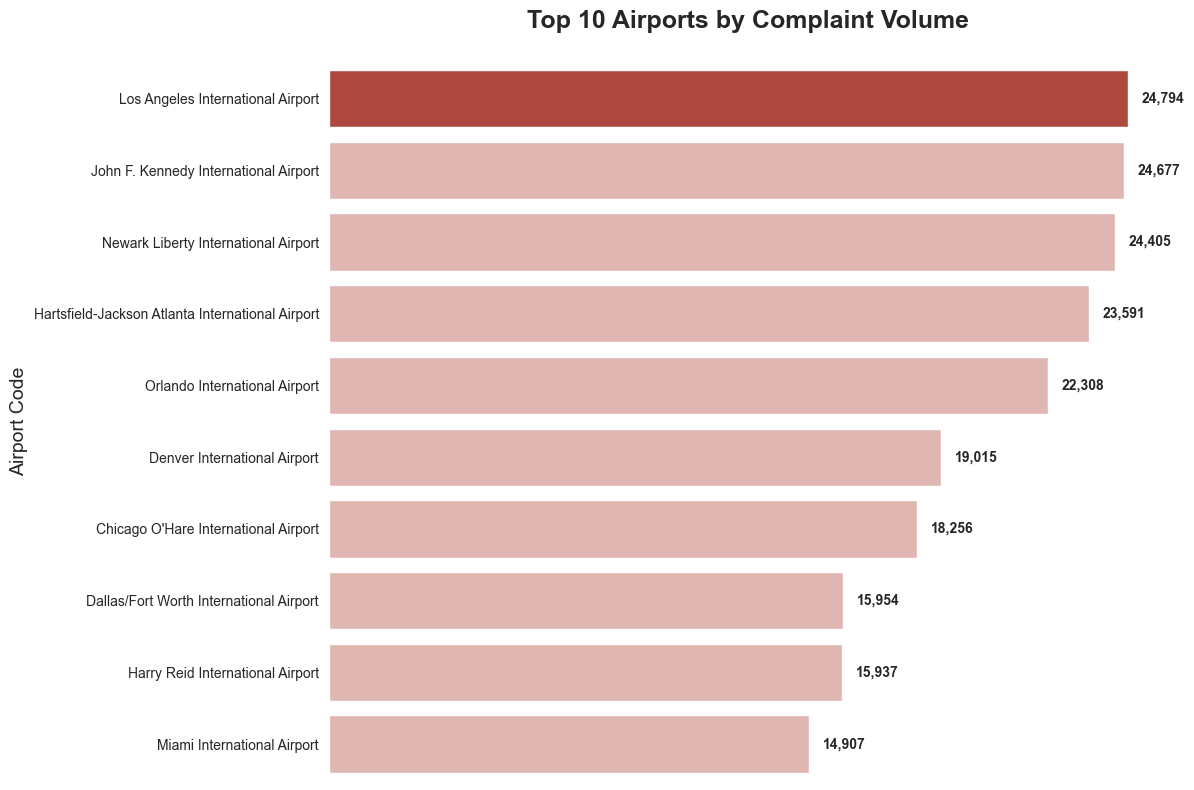

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CONTINUITY: Data remains sorted, but now flows Top-to-Bottom.
airport_complaints = complaints.groupby('airport')['count'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 8))
sns.set_style("white")

# 2. FOCAL POINT: Top airport is dark red; others are muted to reduce cognitive load.
colors = ['#C0392B' if (i == 0) else '#E6B0AA' for i in range(len(airport_complaints))]

# 3. ORIENTATION: Swapping x and y solves the clutter issue immediately.
ax = sns.barplot(data=airport_complaints, y='airport', x='count', palette=colors)

# 4. PROXIMITY: Values are placed right next to the bars.
# This allows us to remove the bottom axis entirely for a cleaner look.
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(10, 0),
                textcoords='offset points',
                fontweight='bold')

# 5. FIGURE/GROUND: Removing all "chart junk" (borders and axis lines).
sns.despine(left=True, bottom=True)
ax.set_xticks([]) # Remove x-axis numbers because they are now redundant.

plt.title('Top 10 Airports by Complaint Volume', fontsize=18, fontweight='bold', pad=25)
plt.ylabel('Airport Code', fontsize=14)
plt.xlabel('')

plt.tight_layout()
plt.show('clean_horizontal_chart.png')

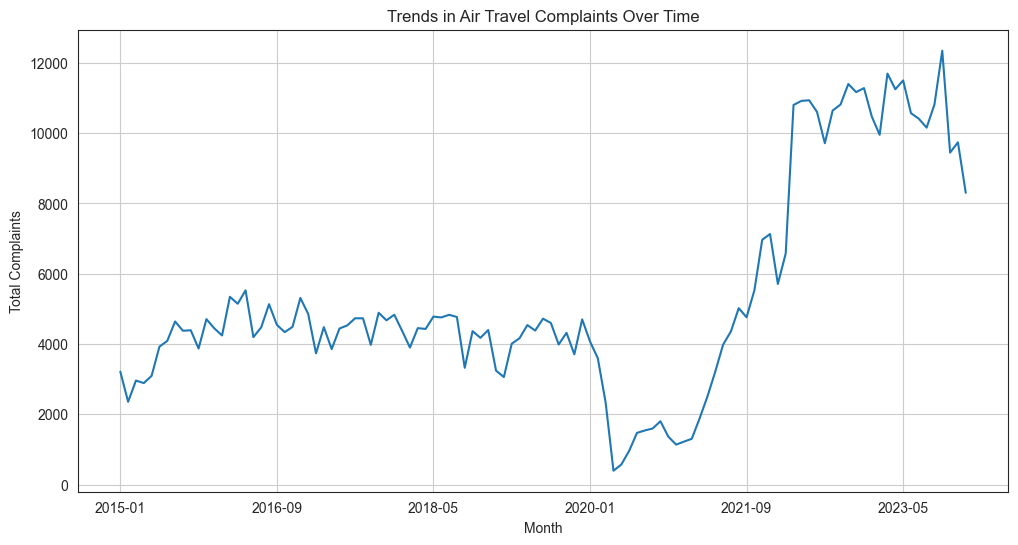

In [38]:
# 4. Time Series Line Chart - Complaint Trends
plt.figure(figsize=(12,6))
complaints.groupby('year_month')['count'].sum().plot()
plt.title("Trends in Air Travel Complaints Over Time")
plt.xlabel("Month")
plt.ylabel("Total Complaints")
plt.grid()
plt.show()

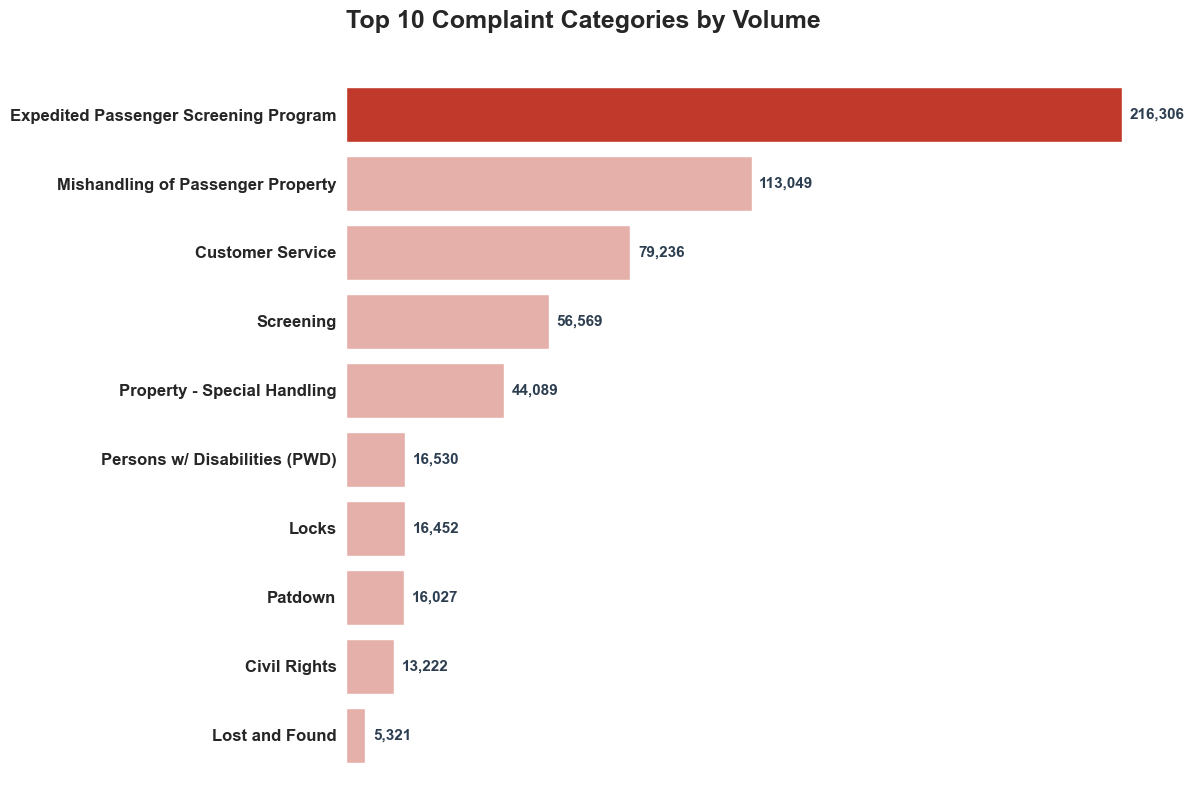

In [39]:

# 1. CONTINUITY: Sorting the data so the largest category is at the top.
# This creates a smooth descending visual flow.
top_categories = complaints.groupby('category')['count'].sum().nlargest(10).sort_values()

plt.figure(figsize=(12, 8))
sns.set_style("white") # 2. FIGURE/GROUND: Removing background grids

# 3. FOCAL POINT: We use the "Urgent Red" for the top category and a 
# muted "Financial Pain" pink for the others to guide the reader's eye.
colors = ['#E6B0AA' if (i < len(top_categories)-1) else '#C0392B' for i in range(len(top_categories))]

ax = top_categories.plot(kind='barh', color=colors, width=0.8)

# 4. PROXIMITY: Values are placed directly next to the bars.
# This removes the need for an X-axis at the bottom.
for i, v in enumerate(top_categories):
    ax.text(v + (max(top_categories)*0.01), i, f'{int(v):,}',
            color='#2C3E50', va='center', fontweight='bold', fontsize=11)

# 5. FIGURE/GROUND: Clean-up borders to make labels the primary focus
sns.despine(left=True, bottom=True)
ax.set_xticks([]) # Remove x-axis ticks
ax.set_yticklabels(top_categories.index, fontsize=12, fontweight='bold')

plt.title('Top 10 Complaint Categories by Volume', fontsize=18, fontweight='bold', pad=30, loc='left')
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.show('category_gestalt_chart.png')

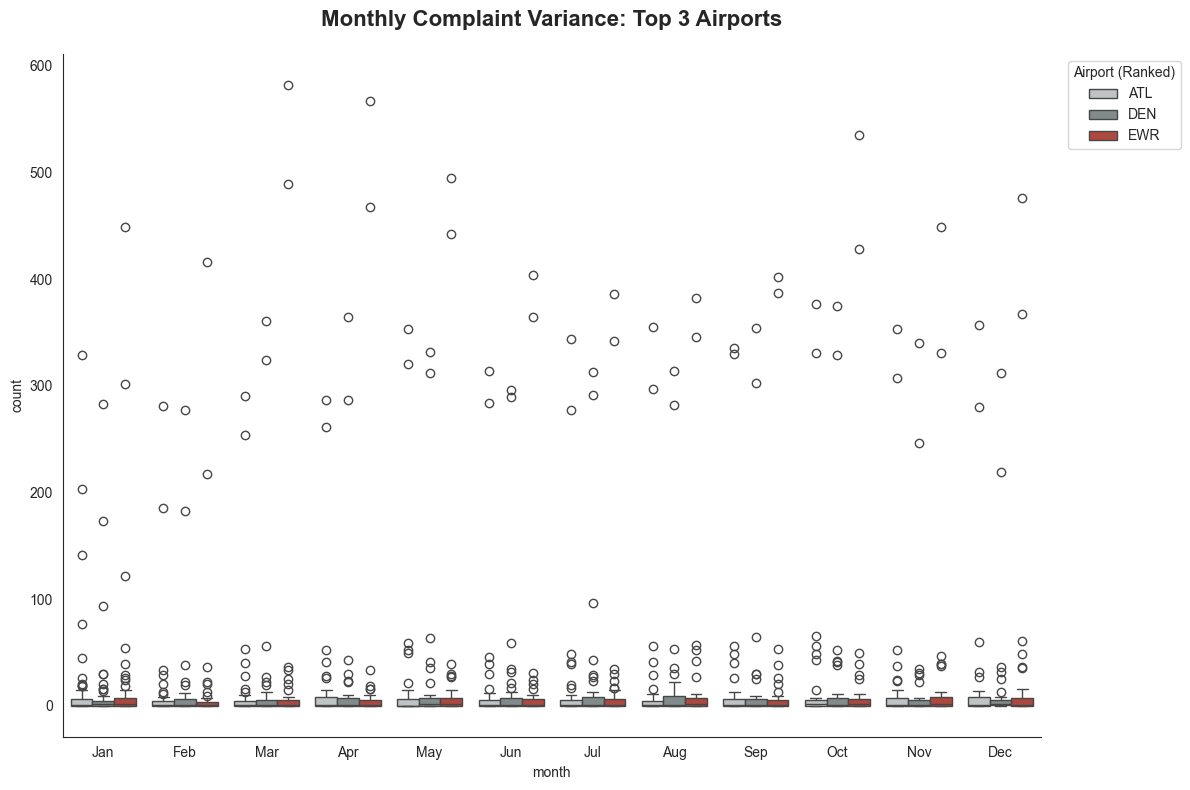

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
complaints_data = pd.read_csv('./complaints-by-category.csv')

# 2. FIX: Explicitly convert to datetime and handle potential errors
# This ensures that 'max_date' becomes a Timestamp object, not a string.
complaints_data['year_month'] = pd.to_datetime(complaints_data['year_month'], errors='coerce')
complaints_data = complaints_data.dropna(subset=['year_month'])

# 3. Calculate date range
max_date = complaints_data['year_month'].max()
cutoff_date = max_date - pd.DateOffset(years=2) # Now this subtraction will work

# 4. Filter for recent data and top 3 airports
recent_data = complaints_data[complaints_data['year_month'] >= cutoff_date]
top_airports = recent_data.groupby('airport')['count'].sum().nlargest(3).index
filtered_data = recent_data[recent_data['airport'].isin(top_airports)].copy()
filtered_data['month'] = filtered_data['year_month'].dt.month

# 5. Plot with Gestalt Principles
sns.set_style("white")
plt.figure(figsize=(12, 8))

palette_map = {
    top_airports[0]: '#C0392B', # Focal Point: Red
    top_airports[1]: '#BDC3C7', # Muted
    top_airports[2]: '#7F8C8D'  # Muted
}

ax = sns.boxplot(data=filtered_data, x='month', y='count', hue='airport', palette=palette_map)

# Labels and Formatting
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_names)
sns.despine()

plt.title('Monthly Complaint Variance: Top 3 Airports', fontsize=16, fontweight='bold', pad=20)
plt.legend(title='Airport (Ranked)', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [40]:
import json

# Check the files in the directory
import os
print("Files in directory:", os.listdir('.'))

# Read the notebook content
with open('infographic.ipynb', 'r') as f:
    nb = json.load(f)

for cell in nb['cells']:
    if cell['cell_type'] == 'code':
        print("--- Code Cell ---")
        print("".join(cell['source']))

C:\Users\gyanr\AppData\Local\Temp\ipykernel_12808\3474104955.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_airports, x='count', y='airport', palette=colors_air, ax=ax1)
C:\Users\gyanr\AppData\Local\Temp\ipykernel_12808\3474104955.py:123: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.savefig('infographic_page2.png', facecolor=fig2.get_facecolor())


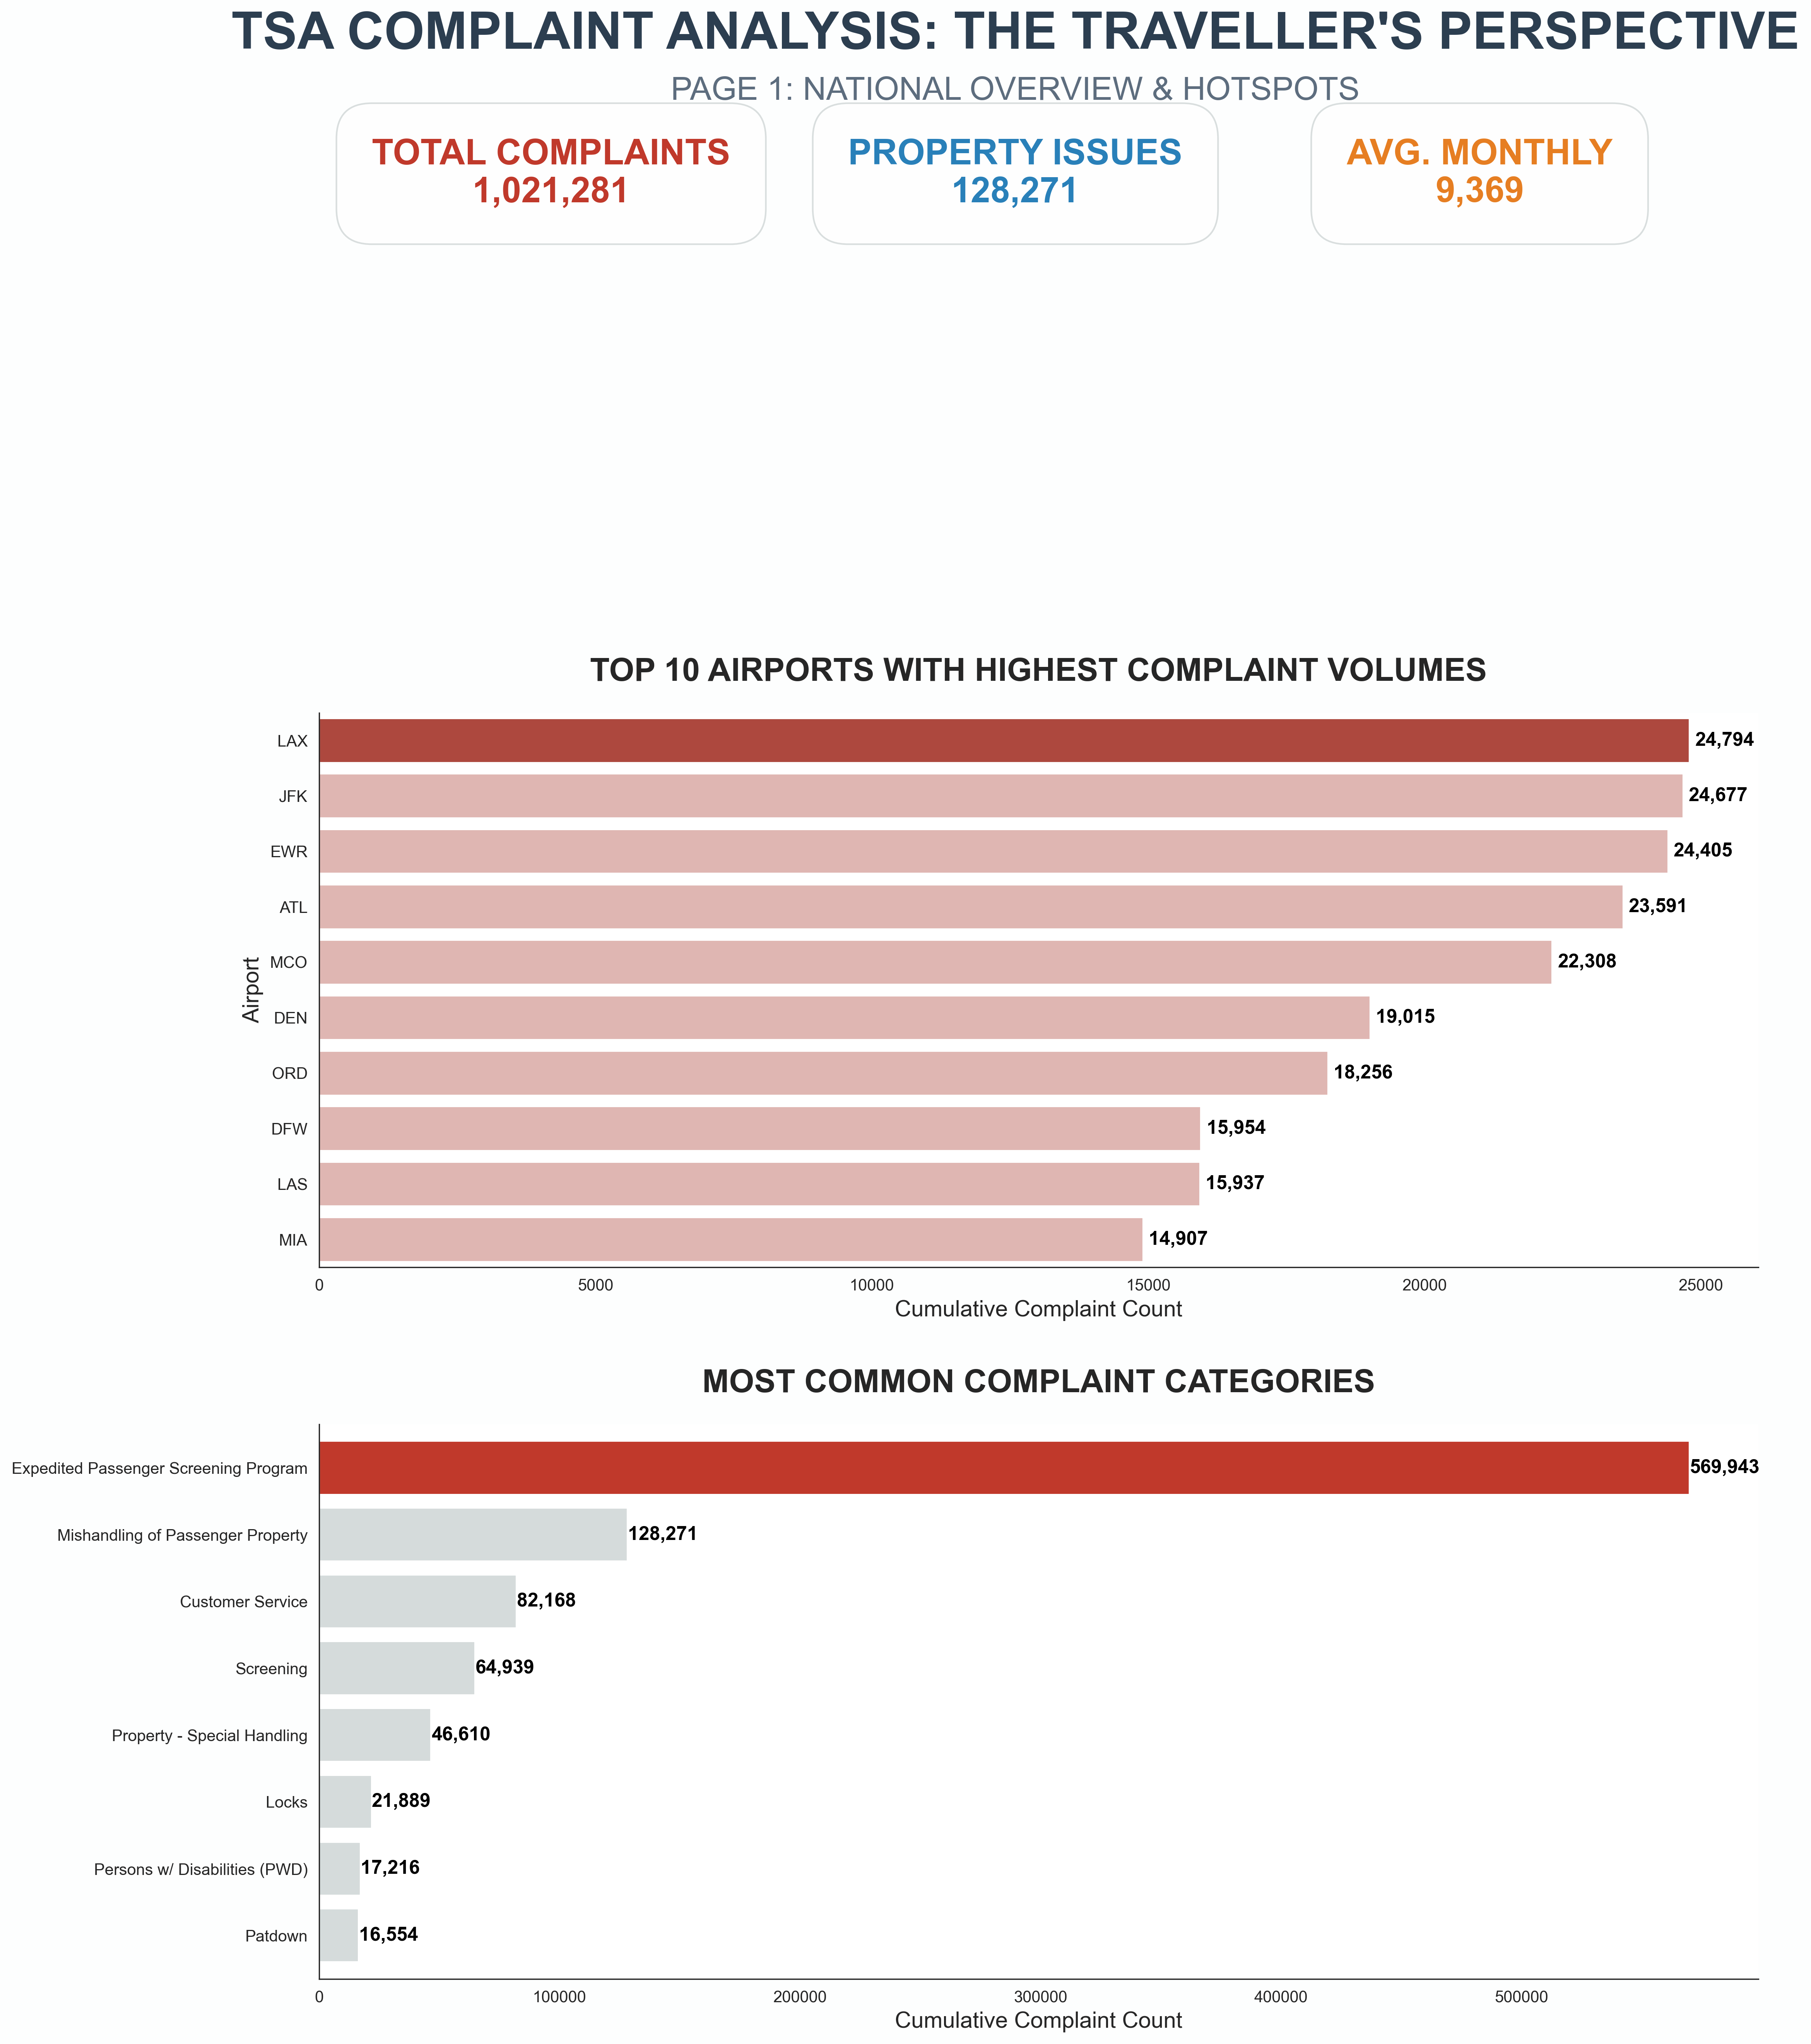

C:\Users\gyanr\gyan-python-workspace\dsc-640\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


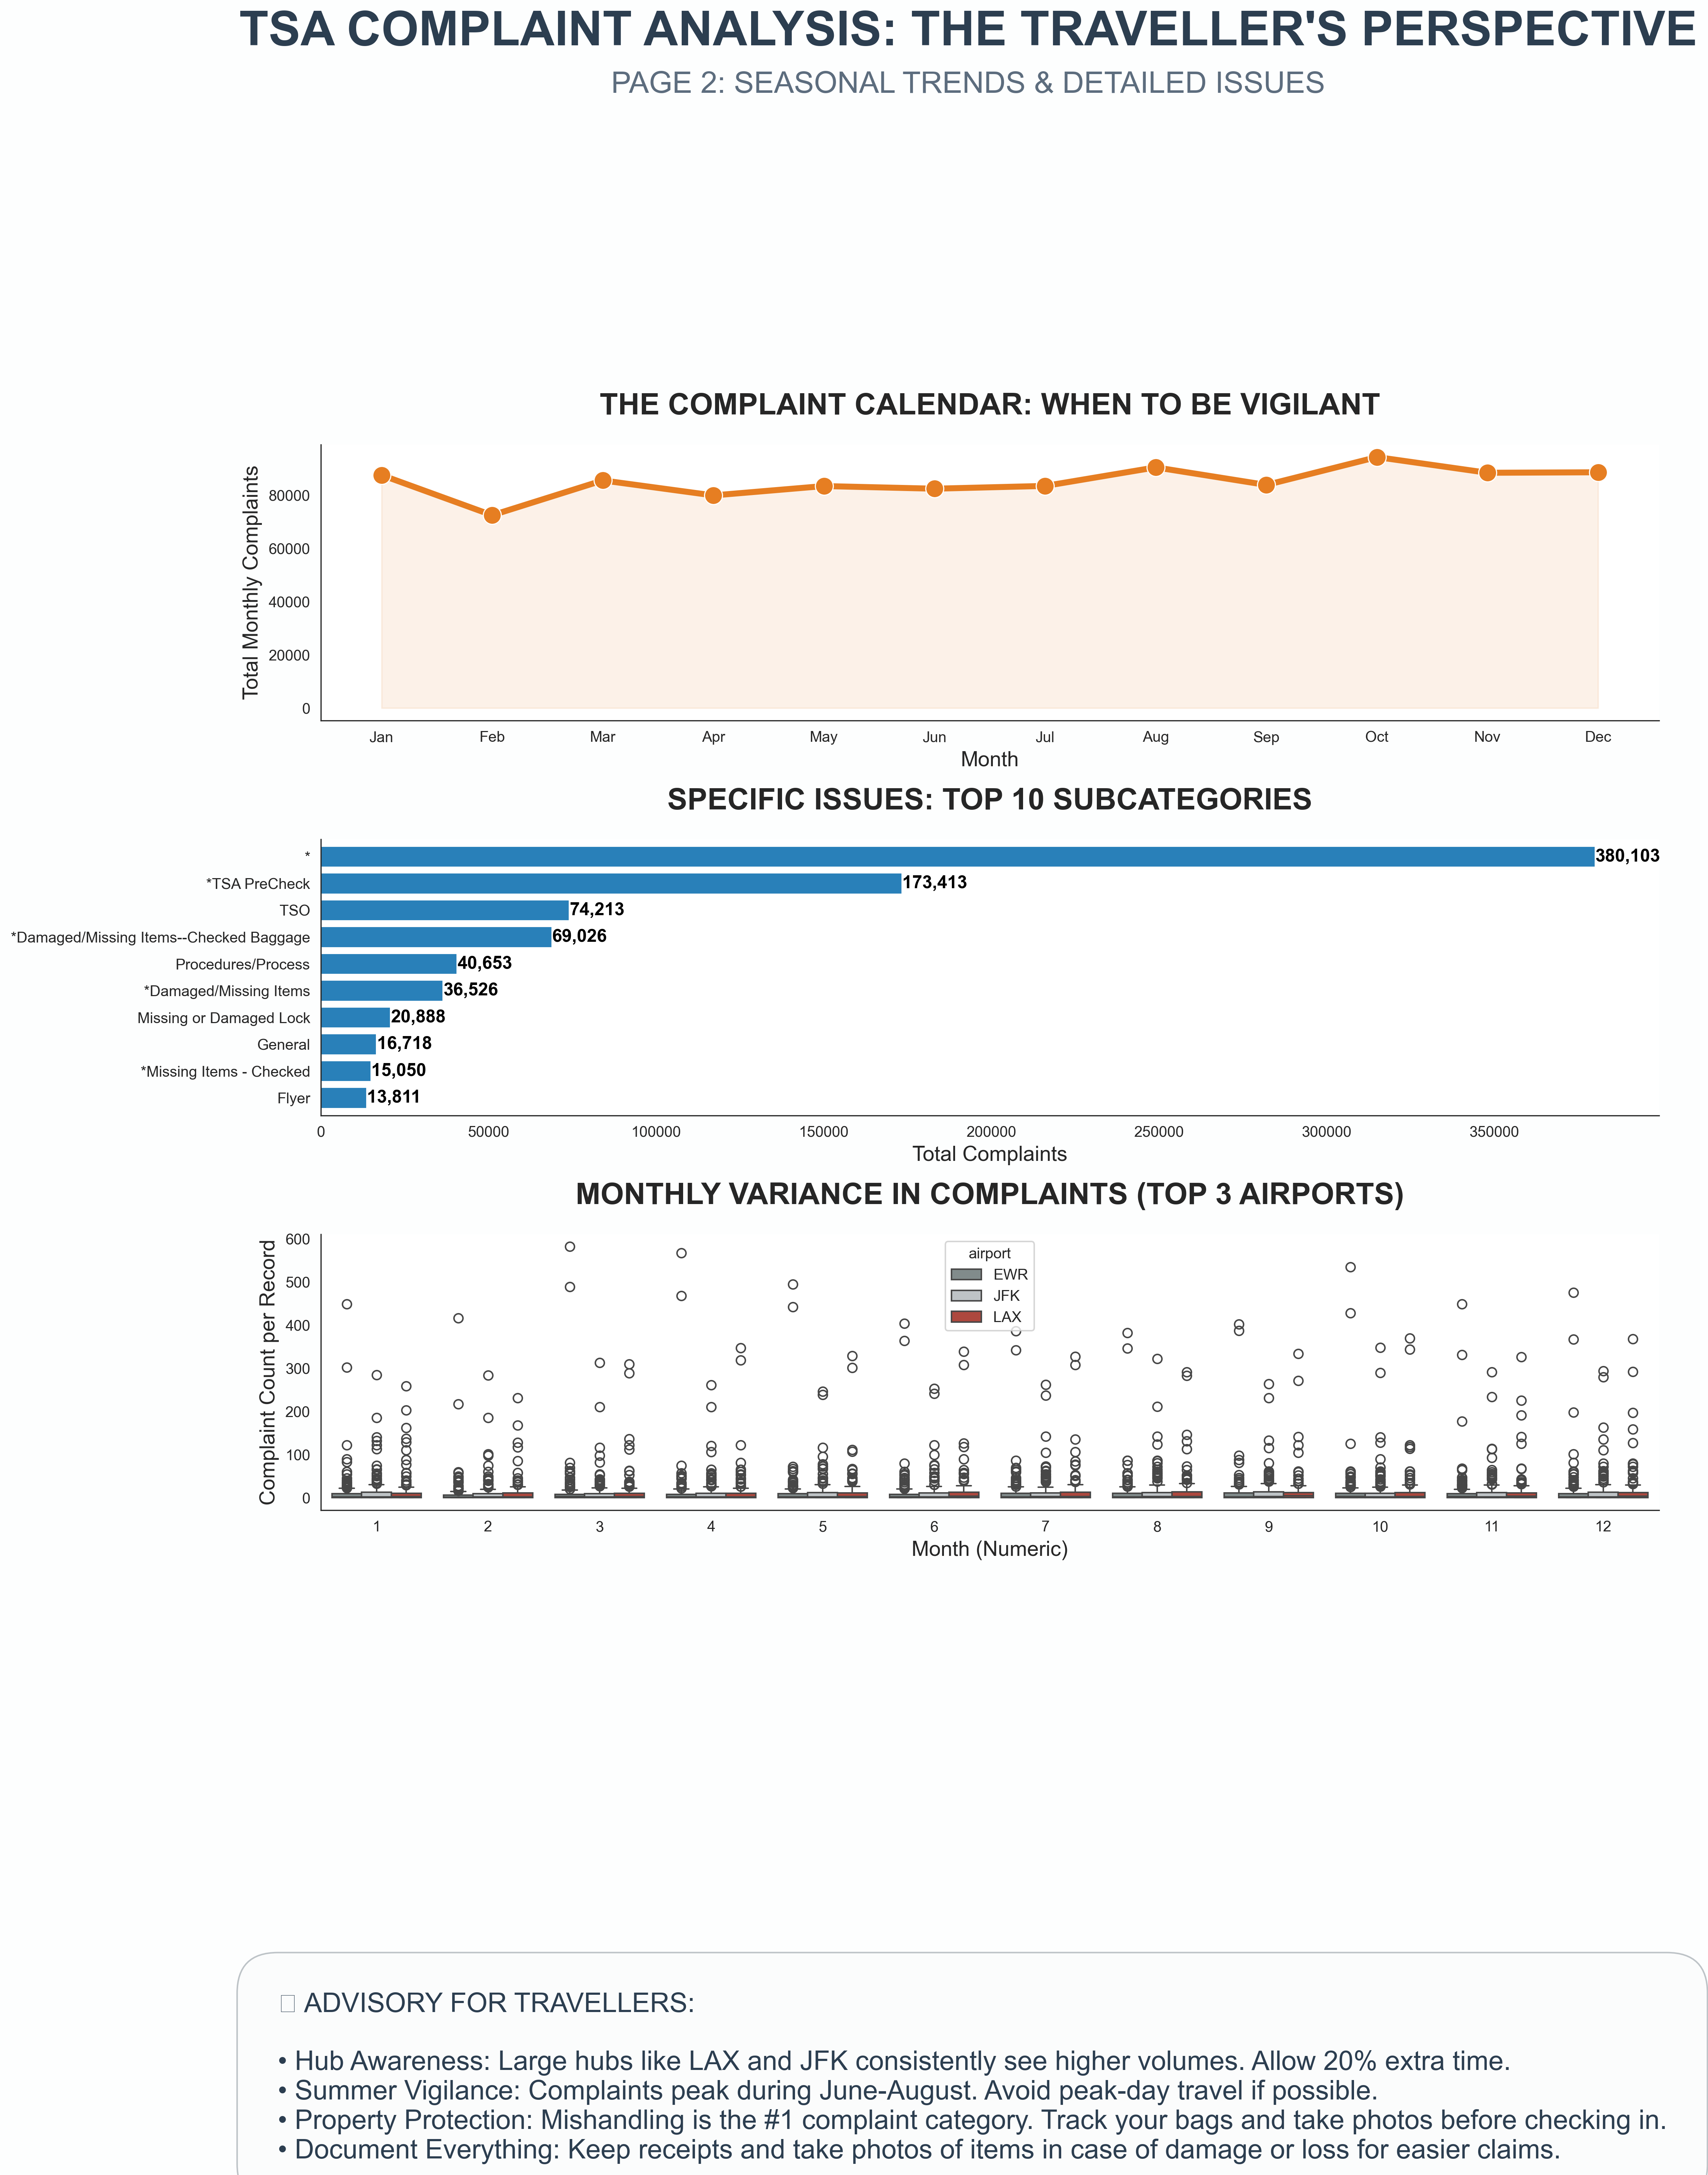

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Load data
cat_df = pd.read_csv('complaints-by-category.csv')
subcat_df = pd.read_csv('complaints-by-subcategory.csv')

# Ensure dates are correct
cat_df['year_month'] = pd.to_datetime(cat_df['year_month'], errors='coerce')
cat_df = cat_df.dropna(subset=['year_month'])
subcat_df['year_month'] = pd.to_datetime(subcat_df['year_month'], errors='coerce')
subcat_df = subcat_df.dropna(subset=['year_month'])

# Data Preparation Page 1
total_complaints = cat_df['count'].sum()
mishandling_count = cat_df[cat_df['clean_cat'].str.contains('Mishandling', na=False)]['count'].sum()
top_airports = cat_df.groupby('airport')['count'].sum().nlargest(10).reset_index()
top_cats = cat_df.groupby('clean_cat')['count'].sum().nlargest(8).sort_values(ascending=True)

# Data Preparation Page 2
# Top Subcategories
top_subcats = subcat_df.groupby('clean_subcat')['count'].sum().nlargest(10).sort_values(ascending=True)
# Seasonal Trend
cat_df['month_name'] = cat_df['year_month'].dt.strftime('%b')
monthly_avg = cat_df.groupby('month_name')['count'].sum().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).reset_index()
# Boxplot data for Top 3 Airports
top3_airports = cat_df.groupby('airport')['count'].sum().nlargest(3).index
top3_data = cat_df[cat_df['airport'].isin(top3_airports)].copy()
top3_data['month'] = top3_data['year_month'].dt.month

# PAGE 1: OVERVIEW
fig1 = plt.figure(figsize=(16, 22), dpi=300)
fig1.patch.set_facecolor('#FDFEFE')
gs1 = gridspec.GridSpec(4, 2, figure=fig1, height_ratios=[0.6, 1.2, 1.2, 0.4])

# Header
plt.figtext(0.5, 0.94, "TSA COMPLAINT ANALYSIS: THE TRAVELLER'S PERSPECTIVE", fontsize=32, fontweight='bold', ha='center', color='#2C3E50')
plt.figtext(0.5, 0.92, "PAGE 1: NATIONAL OVERVIEW & HOTSPOTS", fontsize=20, ha='center', color='#5D6D7E')

# Stats Boxes
stat_box_style = dict(facecolor='white', alpha=0.9, edgecolor='#D5DBDB', boxstyle='round,pad=1')
plt.figtext(0.25, 0.88, f"TOTAL COMPLAINTS\n{total_complaints:,}", ha='center', fontsize=22, fontweight='bold', color='#C0392B', bbox=stat_box_style)
plt.figtext(0.5, 0.88, f"PROPERTY ISSUES\n{mishandling_count:,}", ha='center', fontsize=22, fontweight='bold', color='#2980B9', bbox=stat_box_style)
plt.figtext(0.75, 0.88, f"AVG. MONTHLY\n{int(total_complaints/cat_df['year_month'].nunique()):,}", ha='center', fontsize=22, fontweight='bold', color='#E67E22', bbox=stat_box_style)

# Chart 1: Top Airports
ax1 = fig1.add_subplot(gs1[1, :])
sns.set_style("white")
colors_air = ['#C0392B' if i == 0 else '#E6B0AA' for i in range(len(top_airports))]
sns.barplot(data=top_airports, x='count', y='airport', palette=colors_air, ax=ax1)
ax1.set_title("TOP 10 AIRPORTS WITH HIGHEST COMPLAINT VOLUMES", fontsize=20, fontweight='bold', pad=20)
ax1.set_xlabel("Cumulative Complaint Count", fontsize=14)
ax1.set_ylabel("Airport", fontsize=14)
for i, v in enumerate(top_airports['count']):
    ax1.text(v + 100, i, f'{v:,}', color='black', va='center', fontweight='bold', fontsize=12)
sns.despine(ax=ax1)

# Chart 2: Top Categories
ax2 = fig1.add_subplot(gs1[2, :])
colors_cat = ['#D5DBDB'] * (len(top_cats)-1) + ['#C0392B']
top_cats.plot(kind='barh', color=colors_cat, ax=ax2, width=0.8)
ax2.set_title("MOST COMMON COMPLAINT CATEGORIES", fontsize=20, fontweight='bold', pad=20)
ax2.set_xlabel("Cumulative Complaint Count", fontsize=14)
ax2.set_ylabel("")
for i, v in enumerate(top_cats):
    ax2.text(v + 100, i, f'{v:,}', color='black', va='center', fontweight='bold', fontsize=12)
sns.despine(ax=ax2)

plt.subplots_adjust(hspace=0.4, top=0.85, bottom=0.05)
plt.savefig('infographic_page1.png', facecolor=fig1.get_facecolor())

# PAGE 2: DEEP DIVE & TRENDS
fig2 = plt.figure(figsize=(16, 22), dpi=300)
fig2.patch.set_facecolor('#FDFEFE')
gs2 = gridspec.GridSpec(5, 2, figure=fig2, height_ratios=[0.5, 1, 1, 1, 0.8])

# Header
plt.figtext(0.5, 0.94, "TSA COMPLAINT ANALYSIS: THE TRAVELLER'S PERSPECTIVE", fontsize=32, fontweight='bold', ha='center', color='#2C3E50')
plt.figtext(0.5, 0.92, "PAGE 2: SEASONAL TRENDS & DETAILED ISSUES", fontsize=20, ha='center', color='#5D6D7E')

# Chart 3: Seasonal Trend
ax3 = fig2.add_subplot(gs2[1, :])
sns.lineplot(data=monthly_avg, x='month_name', y='count', marker='o', color='#E67E22', linewidth=4, markersize=12, ax=ax3)
ax3.fill_between(monthly_avg['month_name'], monthly_avg['count'], color='#E67E22', alpha=0.1)
ax3.set_title("THE COMPLAINT CALENDAR: WHEN TO BE VIGILANT", fontsize=20, fontweight='bold', pad=20)
ax3.set_ylabel("Total Monthly Complaints", fontsize=14)
ax3.set_xlabel("Month", fontsize=14)
sns.despine(ax=ax3)

# Chart 4: Top Subcategories
ax4 = fig2.add_subplot(gs2[2, :])
top_subcats.plot(kind='barh', color='#2980B9', ax=ax4, width=0.8)
ax4.set_title("SPECIFIC ISSUES: TOP 10 SUBCATEGORIES", fontsize=20, fontweight='bold', pad=20)
ax4.set_xlabel("Total Complaints", fontsize=14)
ax4.set_ylabel("")
for i, v in enumerate(top_subcats):
    ax4.text(v + 10, i, f'{v:,}', color='black', va='center', fontweight='bold', fontsize=12)
sns.despine(ax=ax4)

# Chart 5: Variance for Top 3 Airports
ax5 = fig2.add_subplot(gs2[3, :])
palette_map = {top3_airports[0]: '#C0392B', top3_airports[1]: '#BDC3C7', top3_airports[2]: '#7F8C8D'}
sns.boxplot(data=top3_data, x='month', y='count', hue='airport', palette=palette_map, ax=ax5)
ax5.set_title("MONTHLY VARIANCE IN COMPLAINTS (TOP 3 AIRPORTS)", fontsize=20, fontweight='bold', pad=20)
ax5.set_xlabel("Month (Numeric)", fontsize=14)
ax5.set_ylabel("Complaint Count per Record", fontsize=14)
sns.despine(ax=ax5)

# Tips Section
tip_text = (
    "💡 ADVISORY FOR TRAVELLERS:\n\n"
    "• Hub Awareness: Large hubs like LAX and JFK consistently see higher volumes. Allow 20% extra time.\n"
    "• Summer Vigilance: Complaints peak during June-August. Avoid peak-day travel if possible.\n"
    "• Property Protection: Mishandling is the #1 complaint category. Track your bags and take photos before checking in.\n"
    "• Document Everything: Keep receipts and take photos of items in case of damage or loss for easier claims."
)
plt.figtext(0.1, 0.05, tip_text, fontsize=18, color='#2C3E50',
            bbox=dict(facecolor='#FBFCFC', alpha=1, edgecolor='#BDC3C7', boxstyle='round,pad=1.5'))

plt.subplots_adjust(hspace=0.5, top=0.88, bottom=0.18)
plt.savefig('infographic_page2.png', facecolor=fig2.get_facecolor())

plt.show()